In [1]:
import tensorflow
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import tslearn
% matplotlib inline

C:\Users\venka\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Reading Data from all the stocks 

In [2]:
directory = os.fsencode('../individual_stocks_5yr/individual_stocks_5yr')

stock_dataframes={}
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        df = pd.read_csv('../individual_stocks_5yr/individual_stocks_5yr/{}'.format(filename) ,encoding='utf-8')
        if len(df) == 1259:
            df = df[['date','volume']]
            stock_dataframes[filename.split('_')[0]] = df

In [3]:
stock_dataframes['UAA'].head(10)

,date,volume
0,2013-02-08,3579600
1,2013-02-11,4905556
2,2013-02-12,4118588
3,2013-02-13,5823228
4,2013-02-14,4055068
5,2013-02-15,6539140
6,2013-02-19,5006720
7,2013-02-20,4661128
8,2013-02-21,6222120
9,2013-02-22,5358804


In [4]:
consolidate_df = stock_dataframes['UAA'][['date']]

In [5]:
for key,df in stock_dataframes.items():
    consolidate_df[key] = stock_dataframes[key]['volume'].values

In [6]:
consolidate_df.head(10)

,date,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,2013-02-08,8407500,158168416,1298137,13858795,1232802,10237828,2000477,5104545,2962576,...,3721016,5390855,11412204,624374,1702218,1206284,7190051,911179,2104483,2599232
1,2013-02-11,8882000,129029425,758016,6031957,1115888,7928236,1880055,2333712,2382919,...,2004285,2629693,8764645,422288,1475369,875010,5352531,665462,1839686,1486115
2,2013-02-12,8126000,151829363,876859,7473991,1318773,7070536,1710274,3279424,2313512,...,1859525,2321225,9751642,357918,1888523,904935,4934311,1048252,2603143,1637279
3,2013-02-13,10259500,118721995,1038574,4860053,2645247,6688100,1884631,2490936,2376089,...,2908631,1537556,8940627,851215,2863447,622205,3999959,931746,2911880,1269625
4,2013-02-14,31879900,88809154,1005376,7570052,1941879,8561425,2096346,4929645,1991339,...,4376224,3246492,13238873,759836,1594884,927050,3949356,860104,2789414,2954324
5,2013-02-15,15628000,97924631,1247063,13296586,2962354,10016820,3221961,2367880,3187346,...,2445781,3634532,15696943,712539,1524160,806462,4334641,1176884,2070979,5415665
6,2013-02-19,11354400,108854046,1730690,8292612,1831692,9584941,2787513,2056485,2734193,...,4673075,2803493,12159051,1226771,1773716,1188046,4288462,1074873,2067036,1206819
7,2013-02-20,14725200,118891367,648693,8096330,1970391,7814093,2641312,3129578,3472897,...,3377862,2303229,13934892,920310,2125467,765723,4302390,1610357,1742745,1842861
8,2013-02-21,11922100,111596821,915160,7261136,1432331,6572998,2647515,2872613,2923019,...,3085135,2542326,10939724,1277143,2896010,1038042,4490422,1029191,2343575,3242213
9,2013-02-22,6071400,82583823,538188,4490835,1003693,7902855,1930654,2835481,2320070,...,2764721,2243993,10260417,727810,3818395,483518,2579023,675761,1274181,954407


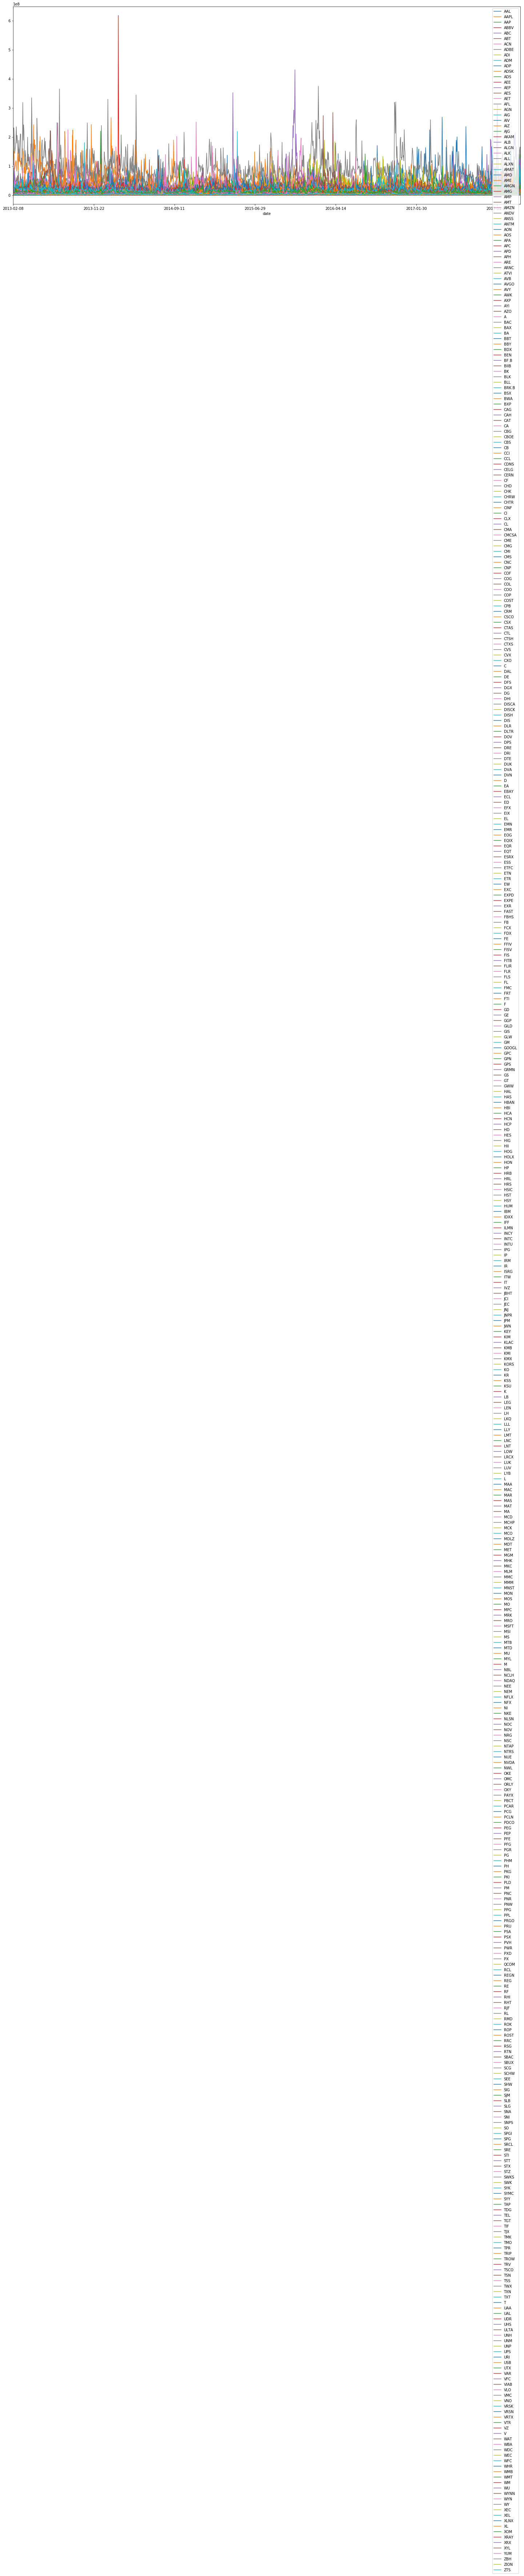

In [7]:
consolidate_df = consolidate_df.set_index('date')
consolidate_df.plot(figsize=(25, 10))


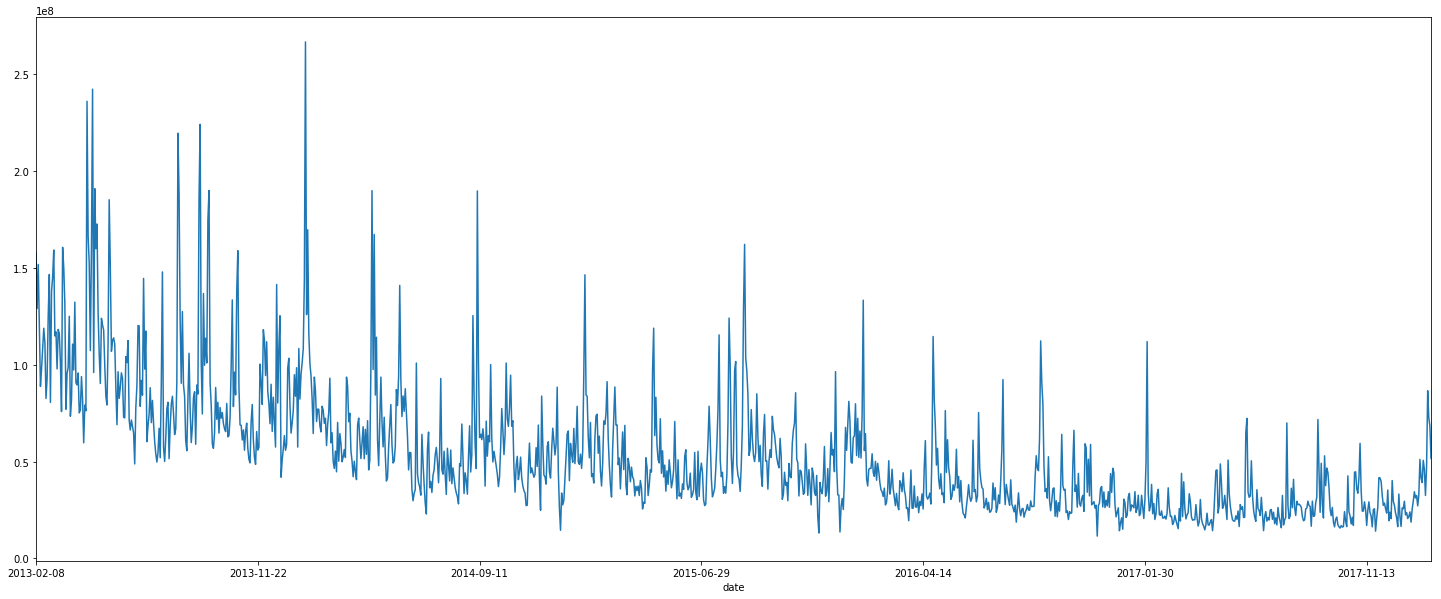

In [8]:
consolidate_df['AAPL'].plot(figsize=(25, 10))

In [9]:
def split_sequence(sequence,n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return X, y

### Timeseries Clustering using DTW

In [10]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
X = random_walks(n_ts=50, sz=32, d=1)
#print(X)
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,max_iter_barycenter=5,random_state=0).fit(X)
km_dba.cluster_centers_.shape

(3, 32, 1)

In [11]:
consolidate_df.head(5)

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,8407500,158168416,1298137,13858795,1232802,10237828,2000477,5104545,2962576,4789484,...,3721016,5390855,11412204,624374,1702218,1206284,7190051,911179,2104483,2599232
2013-02-11,8882000,129029425,758016,6031957,1115888,7928236,1880055,2333712,2382919,4418487,...,2004285,2629693,8764645,422288,1475369,875010,5352531,665462,1839686,1486115
2013-02-12,8126000,151829363,876859,7473991,1318773,7070536,1710274,3279424,2313512,5535196,...,1859525,2321225,9751642,357918,1888523,904935,4934311,1048252,2603143,1637279
2013-02-13,10259500,118721995,1038574,4860053,2645247,6688100,1884631,2490936,2376089,6749912,...,2908631,1537556,8940627,851215,2863447,622205,3999959,931746,2911880,1269625
2013-02-14,31879900,88809154,1005376,7570052,1941879,8561425,2096346,4929645,1991339,7250119,...,4376224,3246492,13238873,759836,1594884,927050,3949356,860104,2789414,2954324


In [12]:
timeseries_df = consolidate_df[:100]
data_for_tclustering = []
for column in timeseries_df.columns:
    single_timeseries = []
    for x in timeseries_df[column].values:
        single_timeseries.append([x])
    data_for_tclustering.append(single_timeseries)

In [13]:
km_dba = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=5,max_iter_barycenter=5,random_state=0).fit_predict(data_for_tclustering)
len(km_dba)

470

In [14]:
clusters = {}
all_stocks = timeseries_df.columns
for idx, val in enumerate(km_dba):
    if val in clusters.keys():
        clusters[val].append(all_stocks[idx])
    else:
        clusters[val] = [all_stocks[idx]]
    

In [15]:
for cluster_index, companies in clusters.items():
    print(cluster_index, companies)

3 ['AAL', 'ABBV', 'ABT', 'AES', 'AIG', 'AMAT', 'ARNC', 'ATVI', 'BBY', 'BK', 'BSX', 'CAT', 'CBS', 'CCL', 'CELG', 'CF', 'CHK', 'COP', 'CRM', 'CSX', 'CTL', 'CTSH', 'CVX', 'DAL', 'DG', 'DHI', 'DIS', 'EA', 'EBAY', 'ESRX', 'ETFC', 'EXC', 'FCX', 'FITB', 'GILD', 'GLW', 'GM', 'HAL', 'HBAN', 'HD', 'HIG', 'HST', 'JNJ', 'JNPR', 'KEY', 'KORS', 'KO', 'KR', 'LEN', 'LLY', 'LOW', 'LUV', 'MAS', 'MA', 'MDLZ', 'MET', 'MGM', 'MNST', 'MO', 'MPC', 'MRK', 'MS', 'MYL', 'NEM', 'NKE', 'NTAP', 'NVDA', 'PEP', 'PG', 'PHM', 'PM', 'PPL', 'QCOM', 'RF', 'SBUX', 'SCHW', 'SLB', 'STZ', 'SYMC', 'TGT', 'TWX', 'TXN', 'UAA', 'UNH', 'USB', 'VLO', 'VZ', 'V', 'WBA', 'WFC', 'WMB', 'WMT', 'WU', 'WY', 'XOM', 'ZTS']
2 ['AAPL', 'BAC']
0 ['AAP', 'ABC', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AET', 'AFL', 'AGN', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALXN', 'AME', 'AMGN', 'AMG', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'ARE', 'AVB', 'AVGO', 'AV

### Define Simple MLP model

In [16]:
n_steps = 4
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
#y

In [24]:


total_x = []
total_y = []
test_x = []
test_Y = []
for stock in clusters[3]:
    sequence = consolidate_df[stock][:100].values
    train_sequence, test_sequence = sequence[:int(len(sequence)* 0.8)], sequence[int(len(sequence)* 0.8):]
    X,y = split_sequence(train_sequence,4)
    test_X,test_y = split_sequence(test_sequence,4)
    for x_val in X:
        total_x.append(list(x_val))
    for test_x_val in test_X:
        test_x.append(list(test_x_val))
        
    for y_val in y:
        total_y.append(y_val)
    for test_y_val in test_y:
        test_Y.append(test_y_val)

In [27]:
total_x

[[8407500, 8882000, 8126000, 10259500],
 [8882000, 8126000, 10259500, 31879900],
 [8126000, 10259500, 31879900, 15628000],
 [10259500, 31879900, 15628000, 11354400],
 [31879900, 15628000, 11354400, 14725200],
 [15628000, 11354400, 14725200, 11922100],
 [11354400, 14725200, 11922100, 6071400],
 [14725200, 11922100, 6071400, 7186400],
 [11922100, 6071400, 7186400, 9419000],
 [6071400, 7186400, 9419000, 7390500],
 [7186400, 9419000, 7390500, 6143600],
 [9419000, 7390500, 6143600, 7376800],
 [7390500, 6143600, 7376800, 8174800],
 [6143600, 7376800, 8174800, 7676100],
 [7376800, 8174800, 7676100, 13243200],
 [8174800, 7676100, 13243200, 9125300],
 [7676100, 13243200, 9125300, 10593700],
 [13243200, 9125300, 10593700, 6961800],
 [9125300, 10593700, 6961800, 8999100],
 [10593700, 6961800, 8999100, 11380000],
 [6961800, 8999100, 11380000, 8383300],
 [8999100, 11380000, 8383300, 17667700],
 [11380000, 8383300, 17667700, 6514100],
 [8383300, 17667700, 6514100, 11805300],
 [17667700, 6514100, 118

### Model Training

In [30]:
epochs = 200
model.fit(array(total_x), array(total_y), epochs=epochs, verbose=0)

### Model Accuracy and Validation

In [ ]:
# test_X,test_y = split_sequence(test_sequence,4)

In [33]:
predict_y = []
for x_input in test_x:
    x_input = array(x_input).reshape((1, n_steps))
    yhat = model.predict(x_input, verbose=0)
    predict_y.append(yhat[0][0])

In [34]:
#printing mean square error
print("MSE:{}".format(np.square(np.subtract(test_Y, predict_y)).mean()))

MSE:15516095691857.611


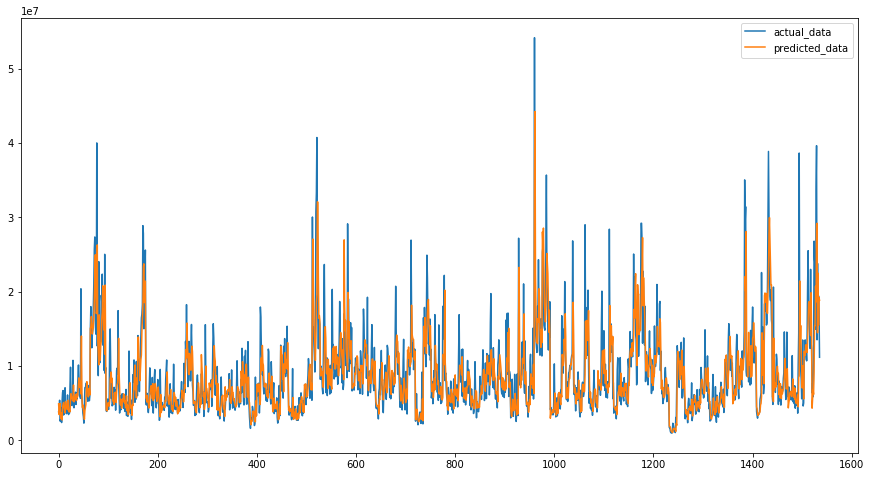

In [37]:
plt.figure(figsize=(15,8))
plt.plot(test_Y, label='actual_data')
plt.plot(predict_y, label='predicted_data')
plt.legend()
plt.show()